<a href="https://colab.research.google.com/github/beatriceghetel/Iriarte_School_of_Tourism_Sustainability_Project/blob/main/SustainabilityNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sustainability Notebook

## Setup

### Install needed libraries

In [ ]:
!pip install nltk
!pip install PyPDF2
!pip install matplotlib

     |████████████████████████████████| 77 kB 2.9 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=2cd9a720b1933b4146b4f20b73d791e08a1d512c1950248fca5ea0257b7a419e
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


### Import required modules

In [ ]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords

import PyPDF2
import pandas as pd

import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

### Download additional packages

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Prepare the data

In order to easily perform counting operations we should perform some operations with the input PDF:


1.   Extract plain text from input PDFs
2.   Perform Text Mining operations:
    * Tokenize
    * Normalization (we skip the Lemmatization because it produces invalid root words)
    * Actual statistics





### 1. Extract text contents from PDFs

In [ ]:
pdfFileObject = open(r"AXA_annual_report_2020.pdf", 'rb')

pdfReader = PyPDF2.PdfFileReader(pdfFileObject)
pdf_pages_count = pdfReader.numPages
print("Total pages to be processed:", pdf_pages_count)

pdf_text = ""
for page_number in range (0, pdf_pages_count):
  # Grab a new page from the PDF and lowercase all words
  current_page_text = pdfReader.getPage(page_number).extractText().lower()
  # # Ensure UTF8 format
  # current_page_text = current_page_text.decode('utf8')
  # Replace \n and \t to avoid situations like this 'REPORT\nCONTENTS' when splitting into tokens
  current_page_text = current_page_text.replace('\n', ' ').replace('\t', ' ')
  # Replace useless symbols [+ . , : ( ) [ ] > < / ]
  current_page_text = current_page_text.replace('+', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ').replace('(', ' ').replace(')', ' '.replace('[', ' ')).replace(']', ' ').replace('>', ' ').replace('<', ' ').replace('/', ' ')
  # Eliminate numerical data
  current_page_text = re.sub("(\d+)", " ", current_page_text)
  pdf_text += current_page_text

print("The first characters extracted from the PDF:", pdf_text[0:250])
print("The last characters extracted from the PDF:", pdf_text[-250:])

pdfFileObject.close()

Total pages to be processed: 488
The first characters extracted from the PDF: universal  registration  document     annual financial report contents  certain preliminary information about this annual report  chairman’s message    chief executiv icer’s message       the axa group        key figures        history        busines
The last characters extracted from the PDF: website at www axa com on which you will ﬁ nd aggregate  regulated information published by  our company  photos  © franck juery  benjamin boccas   this document is printed in compliance with iso     for an environment management system  www axa com 


### Tokenize

The minimum word length can be lower than 3, in order to filter blanks, punctuation or connection words like 'or'. However if we increment it a bit it adds a huge optimization to the time needed for further processing and elimination of the other complex stopwords using NLTK (previous to the tricks done, the process of eliminating the stopwords was running until timing out). Hence, better keep it at > 3.

In [ ]:
MIN_WORD_LENGTH_FILTER = 3

split_pdf_text = pdf_text.split(' ');
text_words = [w.strip() for w in split_pdf_text if len(w) > MIN_WORD_LENGTH_FILTER]

print("Extracted words count: ", len(text_words))
print("Extracted unique words count: ", len(set(text_words)))
print("Preview first 10 extracted words: ", text_words[:10])

Extracted words count:  139532
Extracted unique words count:  11986
Preview first 10 extracted words:  ['universal', 'registration', 'document', 'annual', 'financial', 'report', 'contents', 'certain', 'preliminary', 'information']


###Set top N value

We will create some charts with most frequent words that appear in the document, please set here the N number. It should be larger than 20 for better results.

In [ ]:
top_N = 20

Checking the top N words of what we have filtered up until this moment we already see an improvement (we don't find 'and', 'the', 'or' etc. However we need to apply Python's NLTK stopwords list to rule out the remaining stopwords and keep only those words that might bring value to our statistics.

In [ ]:
words_frequency = FreqDist(text_words)
popular_words = sorted(words_frequency, key = words_frequency.get, reverse = True)
top_words = popular_words[:top_N]
print(top_words)

['with', 'financial', 'group', 'report', 'from', 'value', 'risk', 'annual', 'insurance', 'that', 'this', 'other', 'which', 'management', 'investment', 'assets', 'business', 'board', 'million', 'document']


### Remove stopwords

In [ ]:
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
filtered_text_words = pattern.sub('', ' '.join(text_words))

filtered_word_tokens = filtered_text_words.split(' ')

words_frequency = FreqDist(filtered_word_tokens)
popular_words = sorted(words_frequency, key = words_frequency.get, reverse = True)
top_words = popular_words[:top_N]
print(top_words)

['financial', 'group', 'report', 'value', 'risk', 'annual', 'insurance', 'management', 'investment', 'assets', 'business', 'million', 'board', 'document', 'registration', 'statements', 'universal', 'including', 'shares', 'fair']


### Visualize the top N words

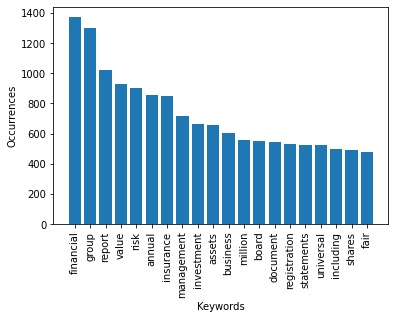

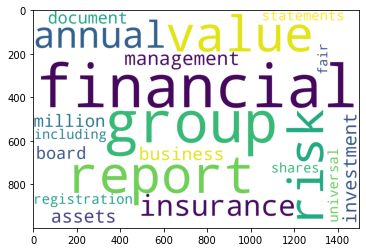

In [ ]:
# Prepare plots data
words_dict = dict(words_frequency)
plot_words = { your_key: words_dict[your_key] for your_key in top_words }

# Bar plot
plt.bar(*zip(*plot_words.items()))
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Occurrences")

plt.show()

# Word cloud plot
wc = WordCloud(
    background_color="white",
    width=1500,
    height=1000,
    max_words=top_N,
    relative_scaling=0.5,
    normalize_plurals=False
  ).generate_from_frequencies(plot_words)

plt.imshow(wc)

## Sustainability factors

### Import sustainability keyword buckets

In [ ]:
col_list = ["Keywords", "ENVIRONMENTAL BUCKET", "SOCIAL BUCKET", "ECONOMIC BUCKET", "INSTITUTIONAL BUCKET"]
df = pd.read_csv("__sustainability_keywords.csv", delimiter=",")

keywords_dict = dict()
keywords_dict["ENVIRONMENTAL BUCKET"] = list({col: df["ENVIRONMENTAL BUCKET"].dropna().values for col in df["ENVIRONMENTAL BUCKET"]})
keywords_dict["SOCIAL BUCKET"] = list({col: df["SOCIAL BUCKET"].dropna().values for col in df["SOCIAL BUCKET"]})
keywords_dict["ECONOMIC BUCKET"] = list({col: df["ECONOMIC BUCKET"].dropna().values for col in df["ECONOMIC BUCKET"]})
keywords_dict["INSTITUTIONAL BUCKET"] = list({col: df["INSTITUTIONAL BUCKET"].dropna().values for col in df["INSTITUTIONAL BUCKET"]})

print("ENVIRONMENTAL: ",keywords_dict["ENVIRONMENTAL BUCKET"])
print("SOCIAL: ", keywords_dict["SOCIAL BUCKET"])
print("ECONOMIC: ", keywords_dict["ECONOMIC BUCKET"])
print("INSTITUTIONAL: ", keywords_dict["INSTITUTIONAL BUCKET"])

ENVIRONMENTAL:  ['air', 'biodegradable', 'biodiesel', 'biomass', 'carbon', 'change', 'circular', 'climate', 'composting', 'conscious', 'conservation', 'cycling', 'decarbonization', 'deforestation', 'dioxide', 'ecological ', 'efficient', 'emissions', 'energy', 'environmental', 'footprint', 'freecycle', 'friendly', 'gas', 'green', 'greenhouse', 'greenwashing', 'impact', 'nature', 'neutrality', 'noise', 'offsets', 'organic', 'positive', 'power', 'preservation', 'reclaimed', 'recycle', 'recycling', 'reduce', 'reforestation', 'remineralize', 'renewable', 'resources', 'sustainability', 'vegan', 'warming', 'waste', 'water', nan]
SOCIAL:  ['charity', 'diversity', 'employees', 'equality', 'ethical', 'fair trade', 'gender', 'job ', 'people', 'responsible', 'safety', 'stability', 'sustainability', 'Women', 'sustainable', 'employee', 'goodwill', nan]
ECONOMIC:  ['byproduct', 'consumer', 'CPG', 'EFRAG', 'EMAS ', 'fair', 'GRI', 'kpi', 'package', 'preservation', 'resource', 'responsible', 'sustainabi

### Normalization and Stemming

#### Applied to the keywords list

For the normalization part, we will only ensure that all the keywords are lower cased. Meanwhile, for the stemming process, we will use the NLTK Porter Stemmer in order to find the root of the keywords.

In [ ]:
porter = nltk.PorterStemmer()

normalized_kw_dict = dict()
normalized_kw_dict["ENVIRONMENTAL BUCKET"] = [porter.stem(str(t).lower()) for t in keywords_dict["ENVIRONMENTAL BUCKET"] if not str(t) == 'nan']
normalized_kw_dict["SOCIAL BUCKET"] = [porter.stem(str(t).lower()) for t in keywords_dict["SOCIAL BUCKET"] if not str(t) == 'nan']
normalized_kw_dict["ECONOMIC BUCKET"] = [porter.stem(str(t).lower()) for t in keywords_dict["ECONOMIC BUCKET"] if not str(t) == 'nan']
normalized_kw_dict["INSTITUTIONAL BUCKET"] = [porter.stem(str(t).lower()) for t in keywords_dict["INSTITUTIONAL BUCKET"] if not str(t) == 'nan']


print(normalized_kw_dict)

{'ENVIRONMENTAL BUCKET': ['air', 'biodegrad', 'biodiesel', 'biomass', 'carbon', 'chang', 'circular', 'climat', 'compost', 'consciou', 'conserv', 'cycl', 'decarbon', 'deforest', 'dioxid', 'ecological ', 'effici', 'emiss', 'energi', 'environment', 'footprint', 'freecycl', 'friendli', 'ga', 'green', 'greenhous', 'greenwash', 'impact', 'natur', 'neutral', 'nois', 'offset', 'organ', 'posit', 'power', 'preserv', 'reclaim', 'recycl', 'recycl', 'reduc', 'reforest', 'reminer', 'renew', 'resourc', 'sustain', 'vegan', 'warm', 'wast', 'water'], 'SOCIAL BUCKET': ['chariti', 'divers', 'employe', 'equal', 'ethic', 'fair trad', 'gender', 'job ', 'peopl', 'respons', 'safeti', 'stabil', 'sustain', 'women', 'sustain', 'employe', 'goodwil'], 'ECONOMIC BUCKET': ['byproduct', 'consum', 'cpg', 'efrag', 'emas ', 'fair', 'gri', 'kpi', 'packag', 'preserv', 'resourc', 'respons', 'sustain', 'trade', 'sustain', 'preserv'], 'INSTITUTIONAL BUCKET': ['efrag', 'ema', 'gri', 'iirc', 'initi', 'iso ', 'perform', 'sasb', 

#### And to the PDF text

In order to count the occurences of the root words of our sustainability keywords we need to also Stem the PDF text. the normalization has already been done at the previous steps.

In [ ]:
stemmed_text_words = [porter.stem(w) for w in filtered_word_tokens]
print(stemmed_text_words[0:10])

['univers', 'registr', 'document', 'annual', 'financi', 'report', 'content', 'certain', 'preliminari', 'inform']


### Counting words

#### Counting vocabulary of words

In [ ]:
words_frequency = FreqDist(stemmed_text_words)
print("Total unique words after cleaning: ", len(words_frequency))
print("Total words after stemming: ", len(stemmed_text_words))

Total unique words after cleaning:  9442
Total words after stemming:  126045


#### Frequency of sustainability keywords

In [ ]:
environmental_kw_counter = 0
social_kw_counter = 0
institutional_kw_counter = 0
economic_kw_counter = 0

environmental_kw_map_counter = dict()
social_kw_map_counter = dict()
institutional_kw_map_counter = dict()
economic_kw_map_counter = dict()

for w in words_frequency:
  if w in normalized_kw_dict["ENVIRONMENTAL BUCKET"]:
    environmental_kw_map_counter[w] = words_frequency[w]
    environmental_kw_counter += words_frequency[w]
  if w in normalized_kw_dict["SOCIAL BUCKET"]:
    social_kw_map_counter[w] = words_frequency[w]
    social_kw_counter += words_frequency[w]
  if w in normalized_kw_dict["INSTITUTIONAL BUCKET"]:
    institutional_kw_map_counter[w] = words_frequency[w]
    institutional_kw_counter += words_frequency[w]
  if w in normalized_kw_dict["ECONOMIC BUCKET"]:
    economic_kw_map_counter[w] = words_frequency[w]
    economic_kw_counter += words_frequency[w]

print("Total keywords count for ENVIRONMENTAL keywords: ", environmental_kw_counter)
print(len(environmental_kw_map_counter), " unique keywords used out of ", len(normalized_kw_dict["ENVIRONMENTAL BUCKET"]))
print(environmental_kw_map_counter)

print("Total keywords count for SOCIAL keywords: ", social_kw_counter)
print(len(social_kw_map_counter), " unique keywords used out of ", len(normalized_kw_dict["SOCIAL BUCKET"]))
print(social_kw_map_counter)

print("Total keywords count for INSTITUTIONAL keywords: ", institutional_kw_counter)
print(len(institutional_kw_map_counter), " unique keywords used out of ", len(normalized_kw_dict["INSTITUTIONAL BUCKET"]))
print(institutional_kw_map_counter)

print("Total keywords count for ECONOMIC keywords: ", economic_kw_counter)
print(len(economic_kw_map_counter), " unique keywords used out of ", len(normalized_kw_dict["ECONOMIC BUCKET"]))
print(economic_kw_map_counter)

Total keywords count for ENVIRONMENTAL keywords:  2330
34  unique keywords used out of  49
{'resourc': 48, 'sustain': 127, 'climat': 143, 'chang': 553, 'posit': 235, 'organ': 66, 'natur': 99, 'impact': 488, 'renew': 29, 'environment': 78, 'reduc': 79, 'effici': 3, 'energi': 52, 'cycl': 10, 'water': 16, 'green': 31, 'greenhous': 6, 'emiss': 63, 'footprint': 39, 'warm': 6, 'offset': 6, 'neutral': 17, 'power': 47, 'air': 2, 'carbon': 37, 'preserv': 10, 'consciou': 1, 'deforest': 1, 'decarbon': 1, 'conserv': 7, 'wast': 18, 'friendli': 1, 'recycl': 10, 'circular': 1}
Total keywords count for SOCIAL keywords:  1089
13  unique keywords used out of  17
{'sustain': 127, 'respons': 259, 'employe': 353, 'peopl': 36, 'safeti': 14, 'divers': 46, 'ethic': 24, 'stabil': 12, 'goodwil': 84, 'women': 46, 'gender': 25, 'chariti': 2, 'equal': 61}
Total keywords count for INSTITUTIONAL keywords:  1012
4  unique keywords used out of  11
{'sustain': 127, 'standard': 158, 'perform': 566, 'initi': 161}
Total k

#### Visualize the numbers

##### Overall Distribution

First, let's see an overall distribution of the keywords to understand where the majority of keyword occurences come from (from which Sustainability category).

We apply a formula in order to compute the pie slices corresponding to each bucket:

`(TOTAL_KEYWORD_COUNTS * 100 / TOTAL_UNIQUE_REPORT_WORDS) * (DIFFERENT_KEYWORDS_FROM_BUCKET_USED * 100 / TOTAL_DISTINCT_KEYWORDS_FROM_BUCKET)`

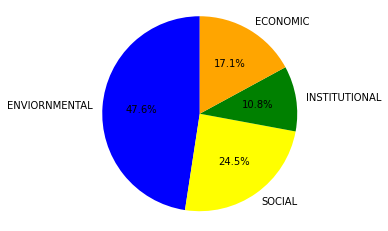

In [ ]:
labels= ['ENVIORNMENTAL', 'SOCIAL', 'INSTITUTIONAL', 'ECONOMIC']
colors=['blue', 'yellow', 'green', 'orange']

sizes= [
        (environmental_kw_counter * 100 ) /len(stemmed_text_words) * (((len(environmental_kw_map_counter) * 100 ) / len(normalized_kw_dict["ENVIRONMENTAL BUCKET"]))),
        (social_kw_counter * 100 ) /len(stemmed_text_words) * (((len(social_kw_map_counter) * 100 ) / len(normalized_kw_dict["SOCIAL BUCKET"]))),
        (institutional_kw_counter * 100 ) /len(stemmed_text_words) * (((len(institutional_kw_map_counter) * 100 ) / len(normalized_kw_dict["INSTITUTIONAL BUCKET"]))),
        (economic_kw_counter * 100 ) /len(stemmed_text_words) * (((len(economic_kw_map_counter) * 100 ) / len(normalized_kw_dict["ECONOMIC BUCKET"])))
      ]

plt.pie(sizes,labels=labels, colors=colors, startangle=90 ,  autopct='%.1f%%')
plt.axis('equal')
plt.show()

##### Top 5 words from each bucket

###### Top words from Environmental bucket

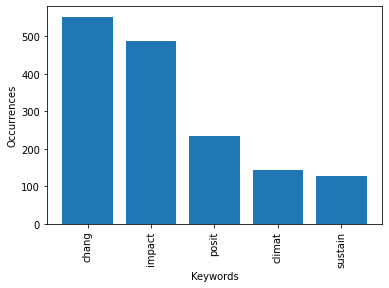

In [ ]:
popular_words = sorted(environmental_kw_map_counter, key = environmental_kw_map_counter.get, reverse = True)
top_words = popular_words[:5]

# Prepare plots data
words_dict = dict(words_frequency)
plot_words = { your_key: environmental_kw_map_counter[your_key] for your_key in top_words }

# Bar plot
plt.bar(*zip(*plot_words.items()))
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Occurrences")
plt.show()

###### Top words from Social bucket

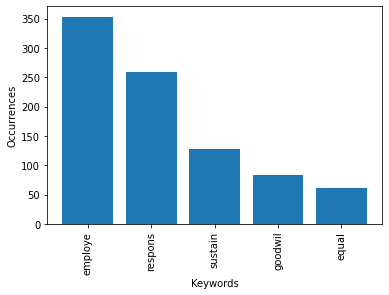

In [ ]:
popular_words = sorted(social_kw_map_counter, key = social_kw_map_counter.get, reverse = True)
top_words = popular_words[:5]

# Prepare plots data
words_dict = dict(words_frequency)
plot_words = { your_key: social_kw_map_counter[your_key] for your_key in top_words }

# Bar plot
plt.bar(*zip(*plot_words.items()))
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Occurrences")
plt.show()

###### Top words from Institutional bucket

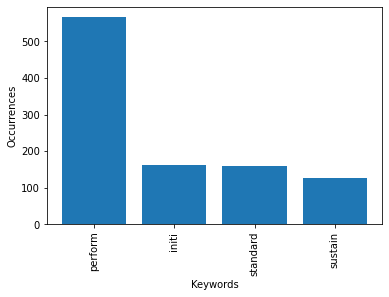

In [ ]:
popular_words = sorted(institutional_kw_map_counter, key = institutional_kw_map_counter.get, reverse = True)
top_words = popular_words[:5]

# Prepare plots data
words_dict = dict(words_frequency)
plot_words = { your_key: institutional_kw_map_counter[your_key] for your_key in top_words }

# Bar plot
plt.bar(*zip(*plot_words.items()))
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Occurrences")
plt.show()

Top words from Economic bucket

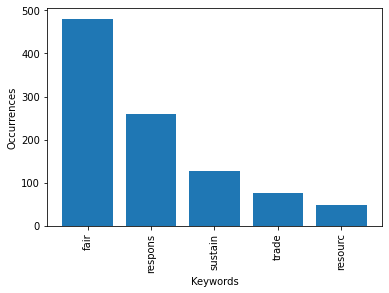

In [ ]:
popular_words = sorted(economic_kw_map_counter, key = economic_kw_map_counter.get, reverse = True)
top_words = popular_words[:5]

# Prepare plots data
words_dict = dict(words_frequency)
plot_words = { your_key: economic_kw_map_counter[your_key] for your_key in top_words }

# Bar plot
plt.bar(*zip(*plot_words.items()))
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Occurrences")
plt.show()

## Stemming small example

In order to better understand why we chose Porter Stemmer and the stemmer step, below is an example of what it does.

In [ ]:
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ')
words1

['list', 'listed', 'lists', 'listing', 'listings']

In [ ]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']